# Manning Machine Learning Bookcamp
## Evaluation metrics for classification
In this notebook we continue the customer churn prediction project. We will evaluate the quality of our model and perform some parameter tuning.

In [1]:
%run ./1-churn-classification.ipynb

7043
Proportion of churned users : 0.27


,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


,mean,diff,risk
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


,mean,diff,risk
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472


,mean,diff,risk
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651


,mean,diff,risk
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412


,mean,diff,risk
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


,mean,diff,risk
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


,mean,diff,risk
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


,mean,diff,risk
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


,mean,diff,risk
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,diff,risk
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


,mean,diff,risk
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


,mean,diff,risk
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


,mean,diff,risk
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


,mean,diff,risk
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560


,mean,diff,risk
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923


,MI
partner,0.009968
seniorcitizen,0.009410
multiplelines,0.000857
phoneservice,0.000229
gender,0.000117


Let's recall the accuracy ouf our model.

In [2]:
accuracy_score(y_val, churn)

0.8016129032258065

We previously arbitrarily chose the probability threshold at p=0.5, but let us loop over different threshold and see the change in accuracy.

0.00 0.261
0.10 0.595
0.20 0.690
0.30 0.755
0.40 0.782
0.50 0.802
0.60 0.790
0.70 0.774
0.80 0.742
0.90 0.739
1.00 0.739


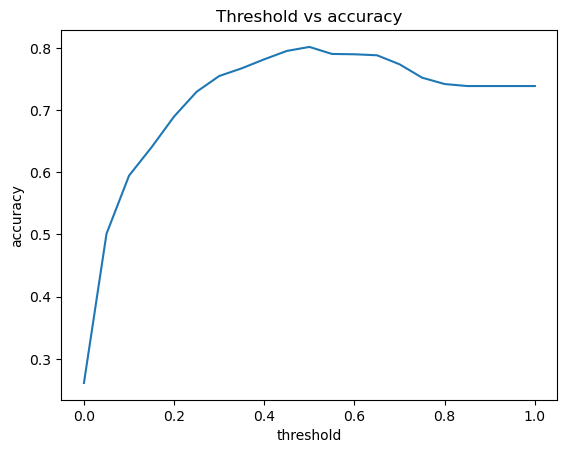

In [3]:
thresholds = np.linspace(0, 1, 11)
for t in thresholds:
    churn = y_pred >= t
    acc = accuracy_score(y_val, churn)
    print('%0.2f %0.3f' % (t, acc))
    
thresholds = np.linspace(0, 1, 21)
accuracies = []
for t in thresholds:
    acc = accuracy_score(y_val, y_pred >= t)
    accuracies.append(acc)
    
plt.plot(thresholds, accuracies)
plt.xlabel('threshold')
plt.ylabel('accuracy')
plt.title('Threshold vs accuracy')
plt.show()

We can see the confusion matrix of our model.

In [4]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val,churn))
print(confusion_matrix(y_val,churn)/confusion_matrix(y_val,churn).sum())

[[1374    0]
 [ 486    0]]
[[0.73870968 0.        ]
 [0.26129032 0.        ]]


Let us take a look at the confusion matrix as well as TPR and FPR at different thresholds.

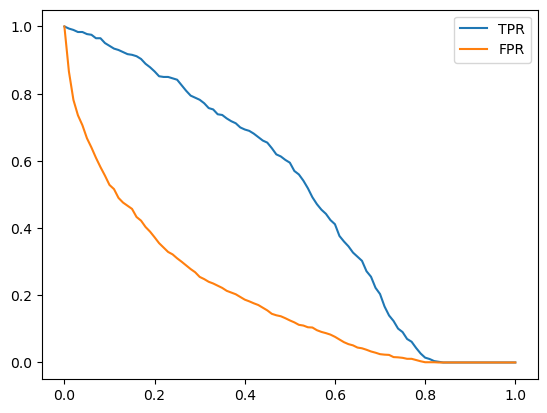

In [5]:
scores = []
thresholds = np.linspace(0, 1, 101)
for t in thresholds:
        tp = ((y_pred >= t) & (y_val == 1)).sum()
        fp = ((y_pred >= t) & (y_val == 0)).sum()
        fn = ((y_pred < t) & (y_val == 1)).sum()
        tn = ((y_pred < t) & (y_val == 0)).sum()
        scores.append((t, tp, fp, fn, tn))

df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
        
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

plt.plot(df_scores.threshold, df_scores.tpr, label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, label='FPR')
plt.legend()

Next we look at the ROC and the AUC.

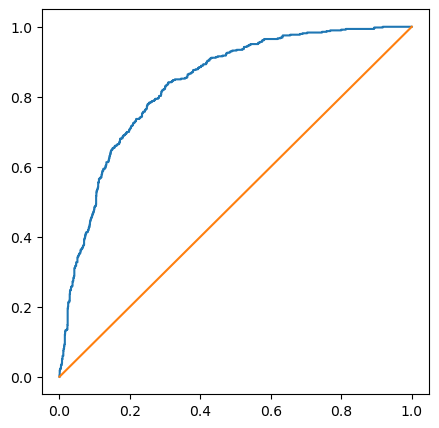

AUC = 0.84


In [6]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.show()

from sklearn.metrics import roc_auc_score

print('AUC = ' '%0.2f' % roc_auc_score(y_val, y_pred))

### Parameter tuning
Now that we have evaluated how our baseline model performs, we will procede to parameter tuning. To do so, we will use K-fold cross-validation. First, we define a function that will train the model and make predictions on a given dataframe.

In [7]:
def train(df, df_validation, y):
    # train
    cat = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear')
    model.fit(X, y)
    
    # predict
    cat = df_validation[categorical + numerical].to_dict(orient='records')
    X = dv.transform(cat)

    y_pred = model.predict_proba(X)[:, 1]
    
    return y_pred

Then, we use the Scikit-learn KFold class to implement our model on k=10 folds and look at their corresponding AUCs.

In [8]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=1)
aucs = []

for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    y_train = df_train.churn.values

    df_val = df_train_full.iloc[val_idx]
    y_val = df_val.churn.values
    
    y_pred = train(df_train, df_val, y_train)

    rocauc = roc_auc_score(y_val, y_pred)
    aucs.append(rocauc)
    
print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))

auc = 0.842 ± 0.012


We will use K-fold cross-validation and the AUC to tune the regularization. First we modify the training function to include a regularization parameter.

In [9]:
def train(df, df_validation, y, C):
    # train
    cat = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear',C=C)
    model.fit(X, y)
    
    # predict
    cat = df_validation[categorical + numerical].to_dict(orient='records')
    X = dv.transform(cat)

    y_pred = model.predict_proba(X)[:, 1]
    
    return y_pred

And finally we loop over a range of values for the parameter C and find the corresponding mean of AUCs over K=5 folds.

In [10]:
nfolds = 5
kfold = KFold(n_splits=nfolds, shuffle=True, random_state=1)

for C in [0.001, 0.01, 0.1, 0.5, 1, 10]:
    aucs = []

    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        y_pred = train(df_train, df_val, y_train, C=C)
        
        auc = roc_auc_score(y_val, y_pred)
        aucs.append(auc)

    print('C=%s, auc = %0.3f ± %0.3f' % (C, np.mean(aucs), np.std(aucs)))

C=0.001, auc = 0.825 ± 0.013
C=0.01, auc = 0.839 ± 0.009
C=0.1, auc = 0.841 ± 0.007
C=0.5, auc = 0.841 ± 0.007
C=1, auc = 0.841 ± 0.007
C=10, auc = 0.841 ± 0.007


We can see that over C = 0.1, the average AUC doesn’t grow anymore. Now using C=0.5, we can test how well our model performs on the test set, after training on both the training and validation sets.

In [11]:
y_train = df_train_full.churn.values
y_test = df_test.churn.values

y_pred = train(df_train_full, df_test, y_train, C=0.1)

auc = roc_auc_score(y_test, y_pred)
print('auc = %.3f' % auc)

auc = 0.858


Our final model gives an AUC of 85.8%.